<a href="https://colab.research.google.com/github/CaioPassos3/TrabalhoIA/blob/main/Lista3Teorica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from collections import Counter

In [2]:
# Dados
X = np.array([
    [1, 0, 1],  # Incluindo 1 para o B0
    [1, 1, 2],
    [1, 2, 2],
    [1, 3, 1],
    [1, 4, 2]
])
y = np.array([3, 6, 7, 8, 11])

# Calculando os coeficientes
X_T = X.T
beta = np.linalg.inv(X_T @ X) @ X_T @ y

print(f'Coeficientes: {beta}')

Coeficientes: [1.87272727 1.69090909 1.09090909]


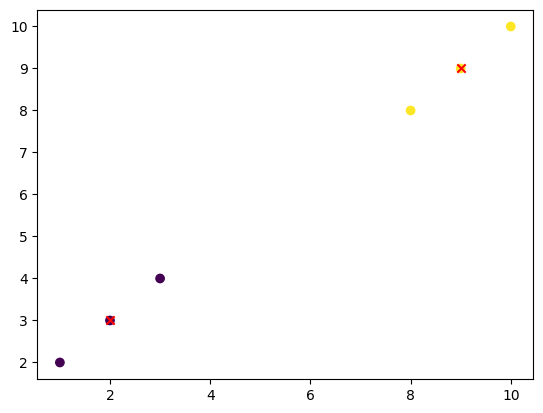

Centroides finais: [[2. 3.]
 [9. 9.]]


In [3]:
# Dados de exemplo (substitua pelos dados reais da sua imagem)
data = np.array([
    [1, 2], [2, 3], [3, 4], [8, 8], [9, 9], [10, 10]
])

# Centroides iniciais (substitua pelos centroides reais da sua imagem)
centroids = np.array([
    [2, 2], [9, 9]
])

def plot_clusters(data, centroids, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.show()

def kmeans(data, centroids, max_iters=100):
    for _ in range(max_iters):
        # Atribuição dos pontos aos clusters
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Recalcular os centroides
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(centroids.shape[0])])

        # Verificar convergência
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Executar o algoritmo k-means
final_centroids, labels = kmeans(data, centroids)

# Plotar os clusters finais
plot_clusters(data, final_centroids, labels)

print("Centroides finais:", final_centroids)

Classificação para k=1: claro
Classificação para k=3: claro
Classificação para k=5: claro
Classificação para k=7: claro


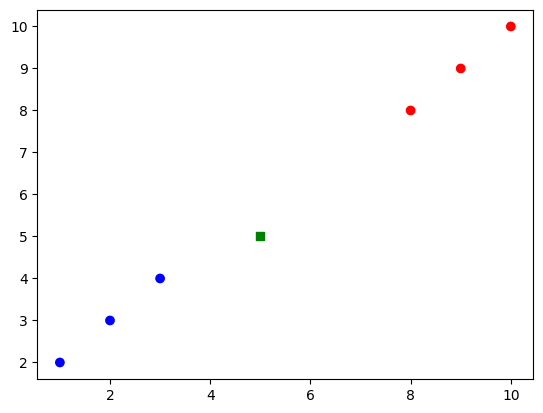

In [4]:
# Dados de exemplo (substitua pelos dados reais da sua imagem)
data = np.array([
    [1, 2], [2, 3], [3, 4], [8, 8], [9, 9], [10, 10]
])
labels = np.array(['claro', 'claro', 'claro', 'escuro', 'escuro', 'escuro'])

# Ponto a ser classificado (substitua pelas coordenadas reais do quadrado)
point = np.array([5, 5])

def knn(data, labels, point, k):
    distances = np.linalg.norm(data - point, axis=1)
    nearest_indices = distances.argsort()[:k]
    nearest_labels = labels[nearest_indices]
    most_common = Counter(nearest_labels).most_common(1)
    return most_common[0][0]

# Classificação para diferentes valores de k
for k in [1, 3, 5, 7]:
    classification = knn(data, labels, point, k)
    print(f"Classificação para k={k}: {classification}")

# Plotar os dados e o ponto a ser classificado
plt.scatter(data[:, 0], data[:, 1], c=['blue' if label == 'claro' else 'red' for label in labels])
plt.scatter(point[0], point[1], c='green', marker='s')
plt.show()

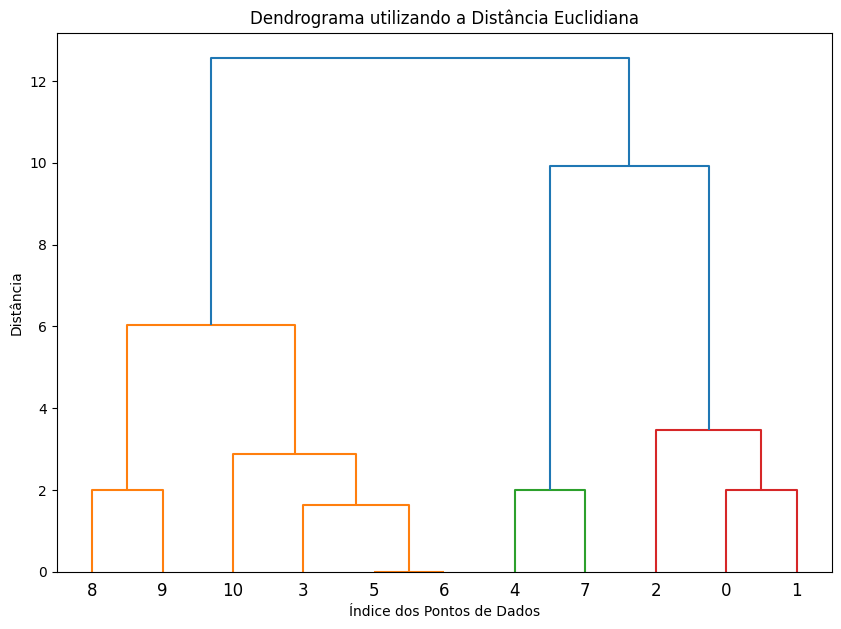

In [5]:
# Dados fornecidos
data = np.array([
    [-3, 0], [-3, 2], [-3, -2], [1, -4], [1, 4],
    [2, -3], [2, -3], [3, 4], [4, 1], [4, -1], [4, -3]
])

# Calcular o linkage usando a distância euclidiana
Z = linkage(data, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrograma utilizando a Distância Euclidiana')
plt.xlabel('Índice dos Pontos de Dados')
plt.ylabel('Distância')
plt.show()